In [1]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [25]:
basket= pd.read_excel("Online_retail[1].xlsx", header = None)
dg = df[0].str.split(',', expand=True)
import warnings
warnings.filterwarnings('ignore')



In [26]:
basket=pd.get_dummies(dg)
basket.head(20)

,0_almonds,0_antioxydant juice,0_asparagus,0_avocado,0_babies food,0_bacon,0_barbecue sauce,0_black tea,0_blueberries,0_body spray,...,16_antioxydant juice,16_french fries,16_frozen smoothie,17_frozen smoothie,17_protein bar,17_spinach,18_cereals,18_mayonnaise,18_spinach,19_olive oil
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.076790,(0_burgers)
1,0.013065,(0_cake)
2,0.052126,(0_chocolate)
3,0.035995,(0_cookies)
4,0.037195,(0_eggs)
...,...,...
84,0.010265,"(1_frozen vegetables, 0_shrimp)"
85,0.013332,"(0_spaghetti, 1_mineral water)"
86,0.011865,"(2_spaghetti, 1_ground beef)"
87,0.017731,"(1_spaghetti, 2_mineral water)"


In [31]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)
rules
rules.sort_values('lift',ascending= False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,0.011802,1.483737,0.957746
9,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,0.011802,1.843084,0.947513
4,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,0.010422,1.411454,0.912318
5,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,0.010422,1.387011,0.913837
0,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,0.008914,1.425868,0.896290


In [32]:
rules.sort_values('lift',ascending =False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,0.011802,1.483737,0.957746
9,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,0.011802,1.843084,0.947513
4,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,0.010422,1.411454,0.912318
5,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,0.010422,1.387011,0.913837
0,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,0.008914,1.425868,0.896290
1,(0_shrimp),(1_frozen vegetables),0.043328,0.031196,0.010265,0.236923,7.594701,0.008914,1.269602,0.907656
7,(2_mineral water),(1_spaghetti),0.049993,0.054793,0.017731,0.354667,6.472882,0.014992,1.464681,0.890004
6,(1_spaghetti),(2_mineral water),0.054793,0.049993,0.017731,0.323601,6.472882,0.014992,1.404506,0.894523
2,(0_spaghetti),(1_mineral water),0.047194,0.064525,0.013332,0.282486,4.377947,0.010286,1.303773,0.809800
3,(1_mineral water),(0_spaghetti),0.064525,0.047194,0.013332,0.206612,4.377947,0.010286,1.200933,0.824803


In [33]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,0.008914,1.425868,0.896290
1,(0_shrimp),(1_frozen vegetables),0.043328,0.031196,0.010265,0.236923,7.594701,0.008914,1.269602,0.907656
2,(0_spaghetti),(1_mineral water),0.047194,0.064525,0.013332,0.282486,4.377947,0.010286,1.303773,0.809800
3,(1_mineral water),(0_spaghetti),0.064525,0.047194,0.013332,0.206612,4.377947,0.010286,1.200933,0.824803
4,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,0.010422,1.411454,0.912318
5,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,0.010422,1.387011,0.913837
6,(1_spaghetti),(2_mineral water),0.054793,0.049993,0.017731,0.323601,6.472882,0.014992,1.404506,0.894523
7,(2_mineral water),(1_spaghetti),0.049993,0.054793,0.017731,0.354667,6.472882,0.014992,1.464681,0.890004
8,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,0.011802,1.483737,0.957746
9,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,0.011802,1.843084,0.947513


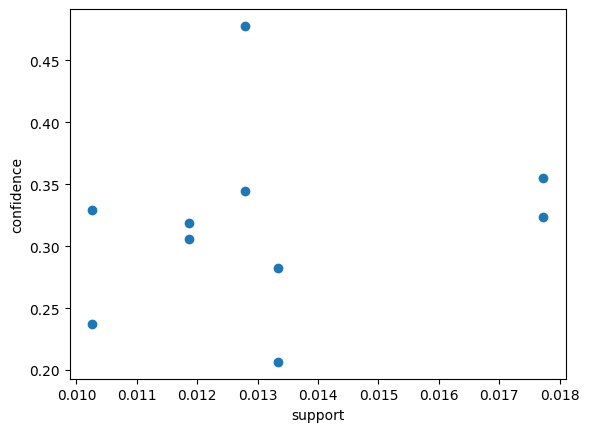

In [34]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

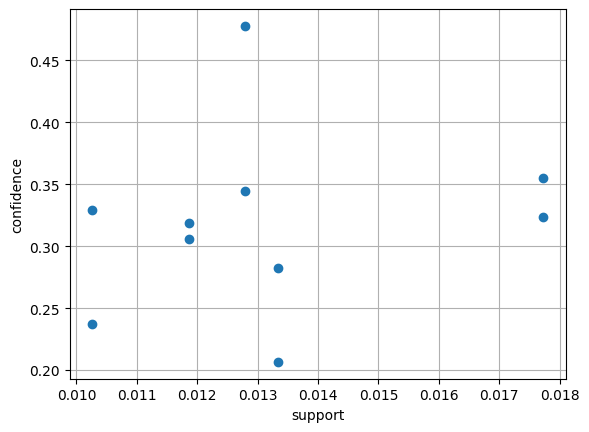

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.grid(True)
plt.show()


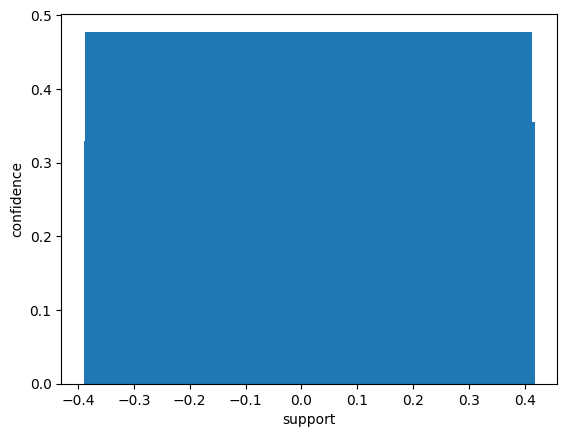

In [36]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [37]:
# Calculate additional metrics
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))

# Sort rules for easier analysis
rules_sorted = rules.sort_values(by=["lift", "confidence"], ascending=[False, False])

# Display the sorted rules
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len
9,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,0.011802,1.843084,0.947513,1,1
8,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,0.011802,1.483737,0.957746,1,1
4,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,0.010422,1.411454,0.912318,1,1
5,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,0.010422,1.387011,0.913837,1,1
0,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,0.008914,1.425868,0.896290,1,1
1,(0_shrimp),(1_frozen vegetables),0.043328,0.031196,0.010265,0.236923,7.594701,0.008914,1.269602,0.907656,1,1
7,(2_mineral water),(1_spaghetti),0.049993,0.054793,0.017731,0.354667,6.472882,0.014992,1.464681,0.890004,1,1
6,(1_spaghetti),(2_mineral water),0.054793,0.049993,0.017731,0.323601,6.472882,0.014992,1.404506,0.894523,1,1
2,(0_spaghetti),(1_mineral water),0.047194,0.064525,0.013332,0.282486,4.377947,0.010286,1.303773,0.809800,1,1
3,(1_mineral water),(0_spaghetti),0.064525,0.047194,0.013332,0.206612,4.377947,0.010286,1.200933,0.824803,1,1


In [ ]:
ConfSupport: Indicates how frequently the itemset (antecedent and consequent together) appears in the dataset. Higher support means the itemset is more common.
idence: Measures the likelihood of the consequent being purchased given that the antecedent is purchased. A higher confidence suggests a stronger association.
Lift: Shows how much more likely the consequent is purchased when the antecedent is purchased, compared to when the antecedent is not purchased. A lift greater than 1 indicates a positive association.
Antecedent Length/Consequent Length: The number of items in the antecedent and consequent, respectively.
Interpreting the Rules:
High Lift, High Confidence: Look for rules with high lift and high confidence. These indicate strong associations where the presence of the antecedent significantly increases the likelihood of purchasing the consequent. For example, a rule like {Milk} -> {Bread} with high lift and confidence suggests that customers who buy milk are very likely to also buy bread.
Product Bundling Opportunities: Identify rules with high lift and reasonable support. These can suggest potential product bundling opportunities. For instance, if {Coffee} -> {Sugar} has a high lift, you might consider offering a bundle deal for coffee and sugar.
Cross-Selling Recommendations: Rules with moderate lift and confidence can be used for personalized product recommendations. If a customer has purchased the antecedent items, you can recommend the consequent items.
Inventory Management: Rules with high support can provide insights for inventory management. If certain items are frequently purchased together, ensure sufficient stock of both items to avoid stockouts.
Caveats and Considerations:
Correlation vs. Causation: Association rules reveal correlations, not necessarily causation. Just because two items are frequently purchased together doesn't mean one causes the purchase of the other.
Context and Domain Knowledge: Interpret the rules in the context of your business and customer base. Domain knowledge is crucial to understand the underlying reasons for the associations and to make informed decisions.
Further Analysis: Consider using additional techniques like clustering or market basket analysis to gain deeper insights into customer segments and their purchasing patterns.

**Interview Questions**


**1.What is lift and why is it important in Association Rules?**
**Answer**: Lift is a measure of how much more likely the consequent itemset is purchased when the antecedent itemset is purchased, compared to when the antecedent is not purchased. In other words, it quantifies the strength of association between two itemsets.



2.**What is support and confidence? How do you calculate them?**
**Answer:**
**Support**: Indicates how frequently an itemset (antecedent and consequent together) appears in the dataset. It's calculated as the proportion of transactions that contain the itemset.
**Support (A -> B) = (Number of transactions containing both A and B) / (Total number of transactions)**
**Confidence**: Measures the likelihood of the consequent itemset being purchased given that the antecedent itemset is purchased. It's calculated as the proportion of transactions containing the antecedent that also contain the consequent.
**Confidence (A -> B) = (Number of transactions containing both A and B) / (Number of transactions containing A)**

**3. What are some limitations or challenges of Association Rules mining?**
**Answer:Spurious Associations**: Association rules may reveal correlations that are not necessarily causal. It's important to interpret the rules with domain knowledge and consider external factors.
**Computational Complexity**: For large datasets with many items, the number of possible itemsets can explode, making the computation of association rules computationally expensive.
**Minimum Support Threshold**: Setting the minimum support threshold too high may miss interesting but infrequent patterns, while setting it too low may generate a large number of trivial or irrelevant rules.
**Rare Items**: Association rules may not capture associations involving rare items, as they might not meet the minimum support threshold.
**Data Sparsity**: If the dataset is sparse (many items occur infrequently), it can be challenging to find meaningful associations.
**Overfitting**: Generating too many rules can lead to overfitting, where the rules may not generalize well to new data.
